In [86]:
import pandas as pd
import torch

from copy import deepcopy

from sklearn import tree, ensemble
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from common_test import *

In [2]:
df_mimic, df_eicu = get_datasets()

In [3]:
def get_confusion_matrixs(dataframe):
    iv = confusion_matrix(dataframe['phys_iv'], dataframe['rein_iv'])
    vaso = confusion_matrix(dataframe['phys_vaso'], dataframe['rein_vaso'])
    return iv, vaso

In [4]:
def get_portion(cm_iv, cm_vaso):
    cm_iv = deepcopy(cm_iv)
    cm_iv = cm_iv.astype(float)
    cm_vaso = deepcopy(cm_vaso)
    cm_vaso = cm_vaso.astype(float)

    for i in range(5):
        cm_iv[i,:] /= cm_iv.sum(axis=1)[i]
        cm_vaso[i,:] /= cm_vaso.sum(axis=1)[i]
        
    return cm_iv, cm_vaso

In [102]:
def plot_heatmap(iv, vaso, title=None):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), dpi=300)
    fig.suptitle(title, y=0.85, size=16)
    colormap = 'YlOrRd'

    axes[0].imshow(iv, cmap=colormap)
    axes[0].set_title('IV', fontsize=13)
    axes[0].set_xlabel('AI', fontsize=13)
    axes[0].set_ylabel('Physician', fontsize=13)
    axes[0].set_ylim(0, 4)
    axes[0].spines[:].set_visible(False)
    axes[0].set_xticks(np.arange(5 + 1) - .5, minor=True)
    axes[0].set_yticks(np.arange(5 + 1) - .5, minor=True)
    axes[0].grid(which="minor", color="w", linestyle='-', linewidth=3)

    axes[1].imshow(vaso, cmap=colormap)
    axes[1].set_ylim(0, 4)
    axes[1].set_title('Vaso', fontsize=13)
    axes[1].set_xlabel('AI', fontsize=13)
    axes[1].set_ylabel('Physician', fontsize=13)
    axes[1].spines[:].set_visible(False)
    axes[1].set_xticks(np.arange(5 + 1) - .5, minor=True)
    axes[1].set_yticks(np.arange(5 + 1) - .5, minor=True)
    axes[1].grid(which="minor", color="w", linestyle='-', linewidth=3)
    
    m = cm.ScalarMappable(cmap=colormap)
    m.set_array([])
    plt.colorbar(m, ax=axes)

    for i in range(5):
        for j in range(5):
            if isinstance(iv[i, j], np.int64):
                axes[0].text(j, i, iv[i, j], ha="center", va="center", color='black', fontsize=12, fontweight='medium')
                axes[1].text(j, i, vaso[i, j], ha="center", va="center", color='black', fontsize=12, fontweight='medium')
            else:
                axes[0].text(j, i, "{:.2f}".format(iv[i, j]), ha="center", va="center", color='black', fontsize=12, fontweight='medium')
                axes[1].text(j, i, "{:.2f}".format(vaso[i, j]), ha="center", va="center", color='black', fontsize=12, fontweight='medium')
    plt.savefig('confusion_matrix.png', dpi=300)

In [103]:
cm_iv_mimic, cm_vaso_mimic = get_confusion_matrixs(df_mimic)
cm_iv_mimic_portion, cm_vaso_mimic_portion = get_portion(cm_iv_mimic, cm_vaso_mimic)

cm_iv_eicu, cm_vaso_eicu = get_confusion_matrixs(df_eicu)
cm_iv_eicu_portion, cm_vaso_eicu_portion = get_portion(cm_iv_eicu, cm_vaso_eicu)

In [104]:
cm_vaso_mimic_df = pd.DataFrame(cm_vaso_mimic)
cm_vaso_mimic_df.to_csv('heatmap_vaso.csv', sep=',')

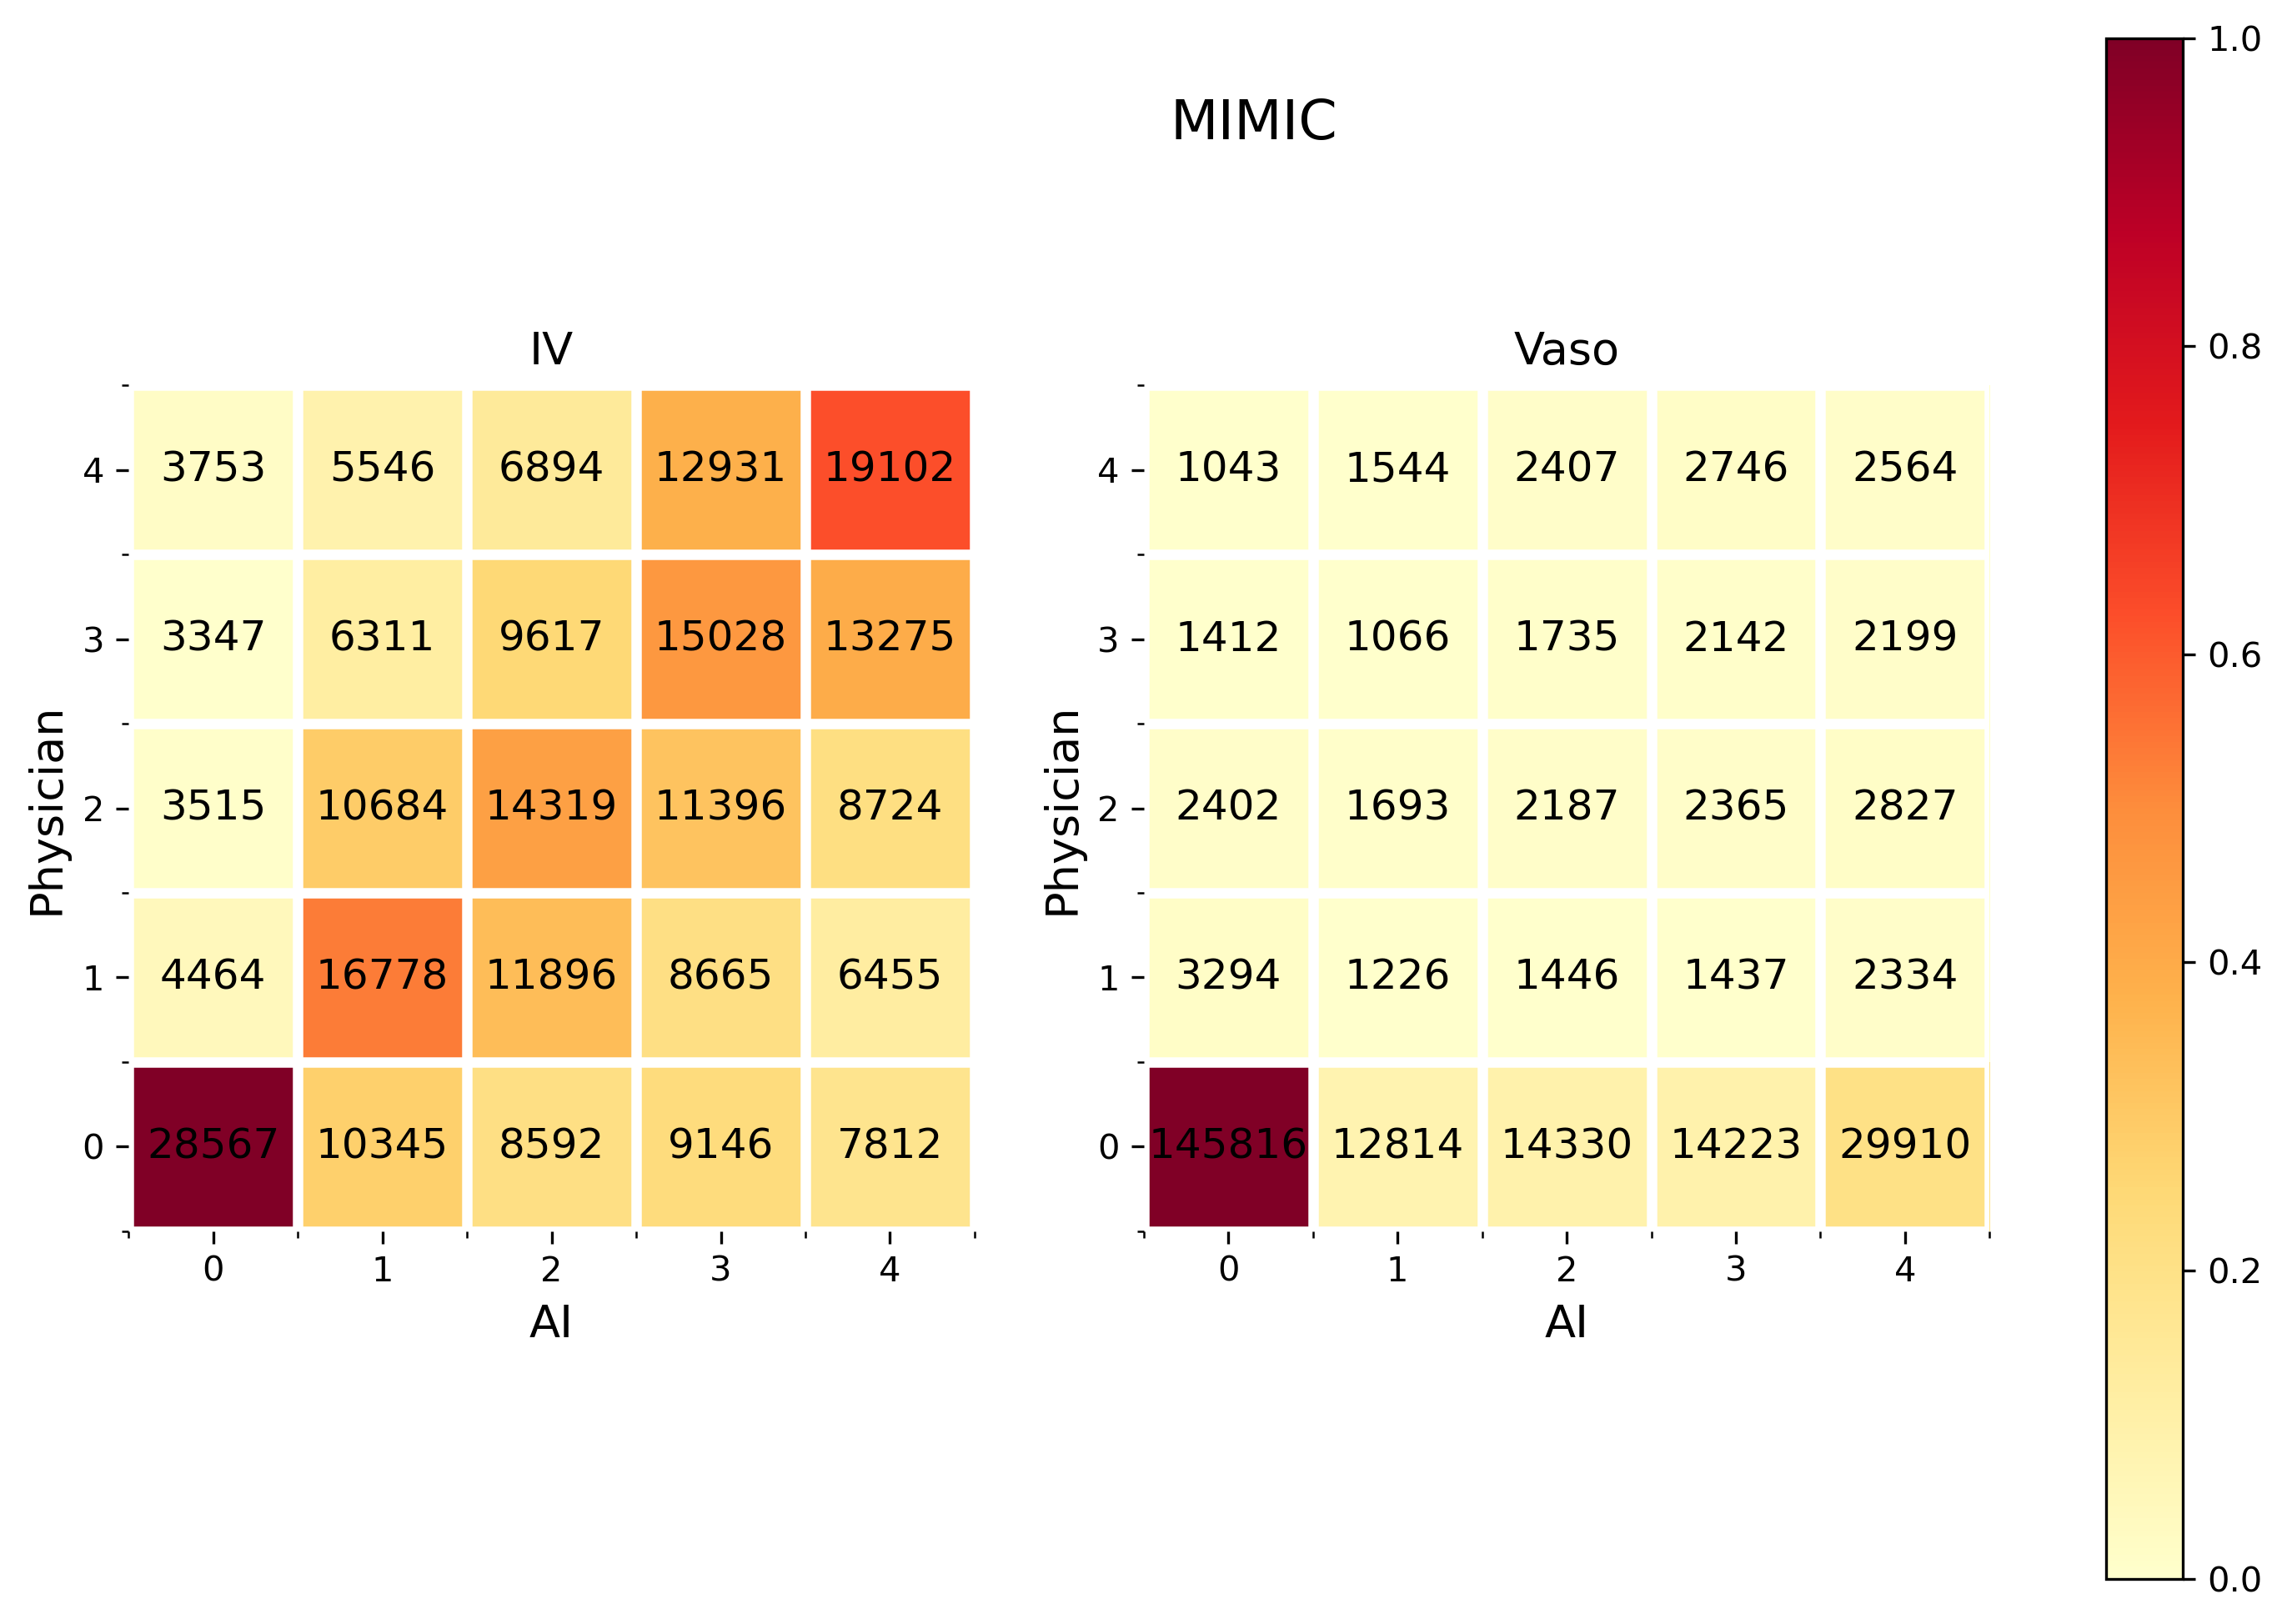

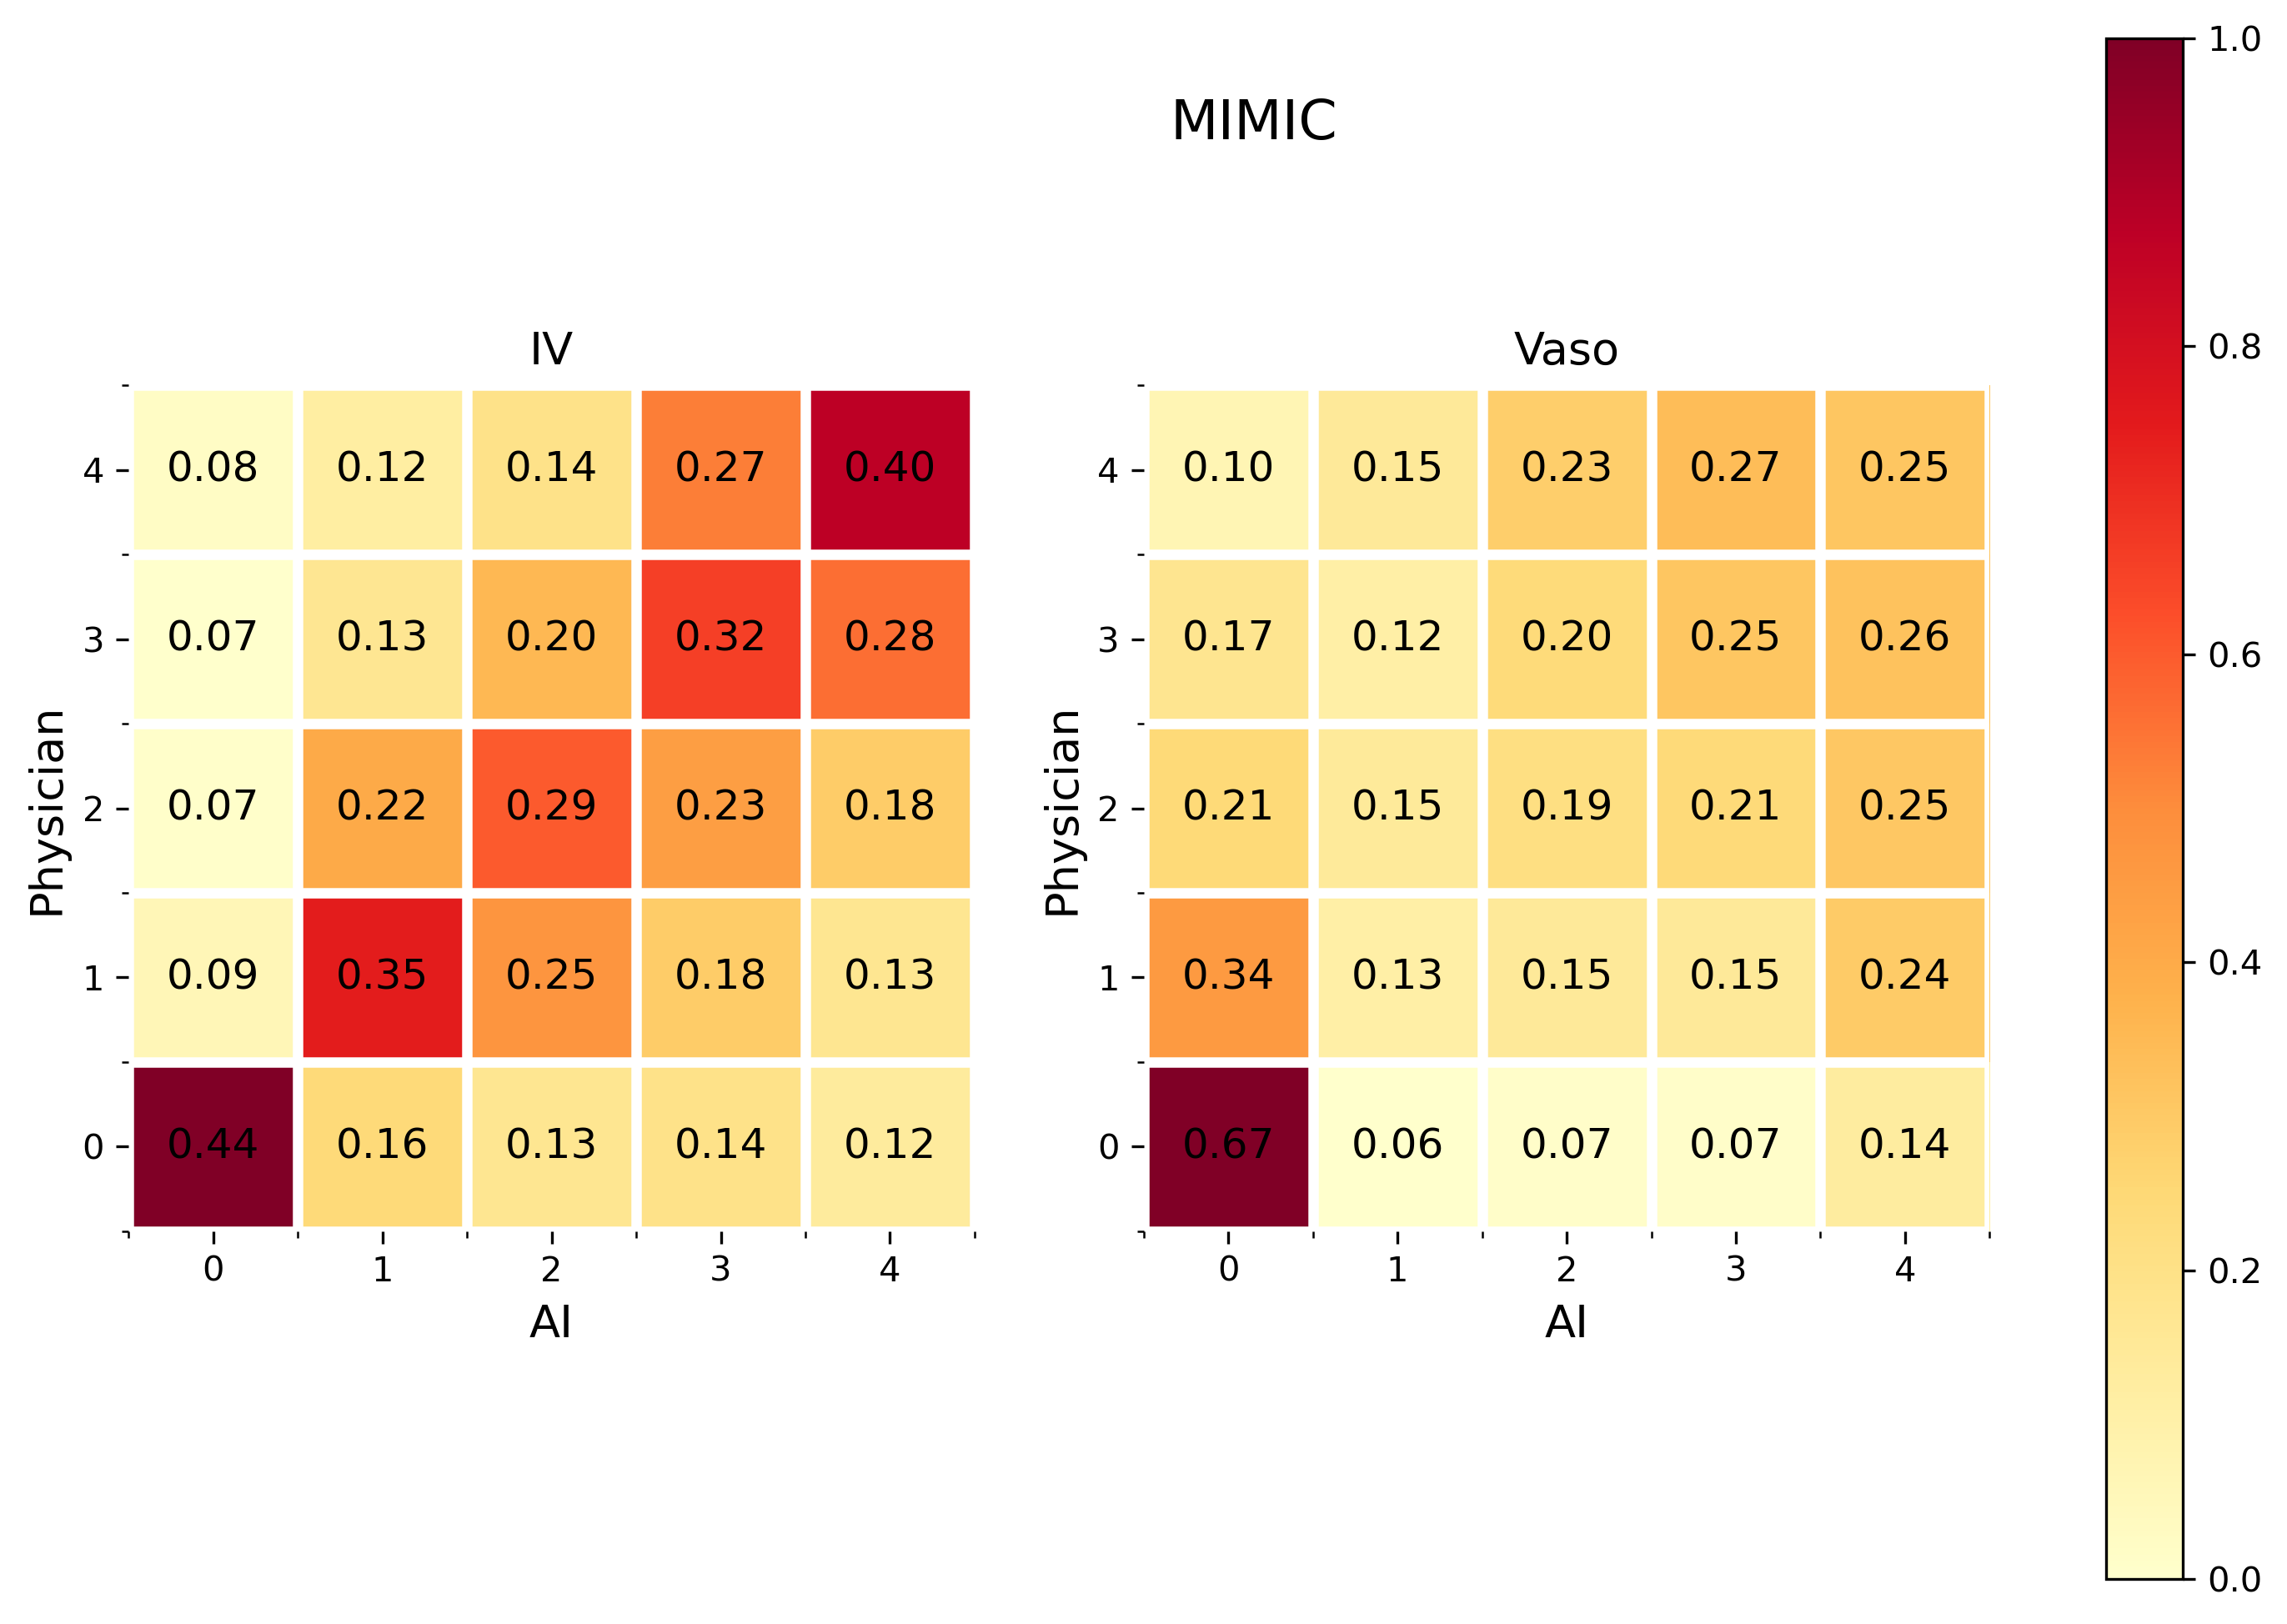

In [105]:
plot_heatmap(cm_iv_mimic, cm_vaso_mimic, "MIMIC")
plot_heatmap(cm_iv_mimic_portion, cm_vaso_mimic_portion, "MIMIC")